In [3]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
import json
import sys
rep_path = ''
import os
import csv
import pandas as pd
from rdkit import Chem
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np






In [2]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has
import pandas as pd

# Path to the CSV file
csv_file_path = 'eos2at5outputs.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)





# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head(10))

# Display information about the dataframe including data types and non-null values
print("\nInformation about the dataframe:")
print(df.info())

# Print the shape of the dataframe 
print("\nShape of the dataframe:", df.shape)

# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df['probability'].describe())

# Check for missing values
print("\nNumber of missing values in each column:")
print(df.isnull().sum())








First few rows of the dataframe:
                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   
5  CSYFJLPYVQTDCQ-MRXNPFEDSA-N   
6  JGGVCLFLOLHMSW-UHFFFAOYSA-N   
7  AKVQZCLFNIRFEL-UDISHMIDSA-N   
8  QCIMKMDGHYXCEB-UHFFFAOYSA-N   
9  SDKIBDZIDPFNHT-UHFFFAOYSA-N   

                                               input  probability  
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1     0.914270  
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1     0.841120  
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl     0.042059  
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...     0.181074  
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...     0.841076  
5  CN1C(=O)C2=C(N=C(N3CCC[C@@H](N)C3)N2CC2=CC(F)=...     0.042599  
6  CNC(=O)C1=CC=CC2=C1N=C(C1=CC=CC=C1O)N2CC1=CC=C...     0.270018  
7  C[C@]12CC[C@H](S)C[C@H]1CCC1C3=CC[C@H](C4=CC(

In [5]:
#Here I have classified blocaked from the predicted probability setting the threshold to be 0.5

import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("eos2at5outputs.csv") 

# Apply threshold to classify probabilities as 1s and 0s
df['activity'] = df['probability'].apply(lambda x: 1 if x >= 0.5 else 0)


df.to_csv("eos2at5outputs.csv", index=False)  

In [6]:
print('After classification:')
print(df.head(10))

After classification:
                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   
5  CSYFJLPYVQTDCQ-MRXNPFEDSA-N   
6  JGGVCLFLOLHMSW-UHFFFAOYSA-N   
7  AKVQZCLFNIRFEL-UDISHMIDSA-N   
8  QCIMKMDGHYXCEB-UHFFFAOYSA-N   
9  SDKIBDZIDPFNHT-UHFFFAOYSA-N   

                                               input  probability  activity  
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1     0.914270         1  
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1     0.841120         1  
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl     0.042059         0  
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...     0.181074         0  
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...     0.841076         1  
5  CN1C(=O)C2=C(N=C(N3CCC[C@@H](N)C3)N2CC2=CC(F)=...     0.042599         0  
6  CNC(=O)C1=CC=CC2=C1N=C(C1=CC=CC=C1O)N2CC1=CC=C...     

In [7]:
# counting the number of blockades out of the 1000 molecules


df = pd.read_csv("eos2at5outputs.csv") 
number_of_blockades = df['activity'].sum()
print("Number of blockades:", number_of_blockades)


Number of blockades: 306


In [10]:


Inchi = pd.read_csv("eos2at5outputs.csv")

# Function to calculate InChIKey for a SMILES string
def smiles_to_inchikey(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        inchikey = Chem.inchi.MolToInchiKey(mol)
        return inchikey
    else:
        return None

# Apply the function to each SMILES string and create a new column for InChIKey
Inchi['InChIKey'] = Inchi['input'].apply(smiles_to_inchikey)

# Save the DataFrame with InChIKey representations as a new CSV file
Inchi.to_csv("output_inchikeys.csv", index=False)

print(Inchi.head(10))


                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   
5  CSYFJLPYVQTDCQ-MRXNPFEDSA-N   
6  JGGVCLFLOLHMSW-UHFFFAOYSA-N   
7  AKVQZCLFNIRFEL-UDISHMIDSA-N   
8  QCIMKMDGHYXCEB-UHFFFAOYSA-N   
9  SDKIBDZIDPFNHT-UHFFFAOYSA-N   

                                               input  probability  activity  \
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1     0.914270         1   
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1     0.841120         1   
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl     0.042059         0   
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...     0.181074         0   
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...     0.841076         1   
5  CN1C(=O)C2=C(N=C(N3CCC[C@@H](N)C3)N2CC2=CC(F)=...     0.042599         0   
6  CNC(=O)C1=CC=CC2=C1N=C(C1=CC=CC=C1O)N2CC1=CC=C...     0.270018       

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14444\2290660703.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


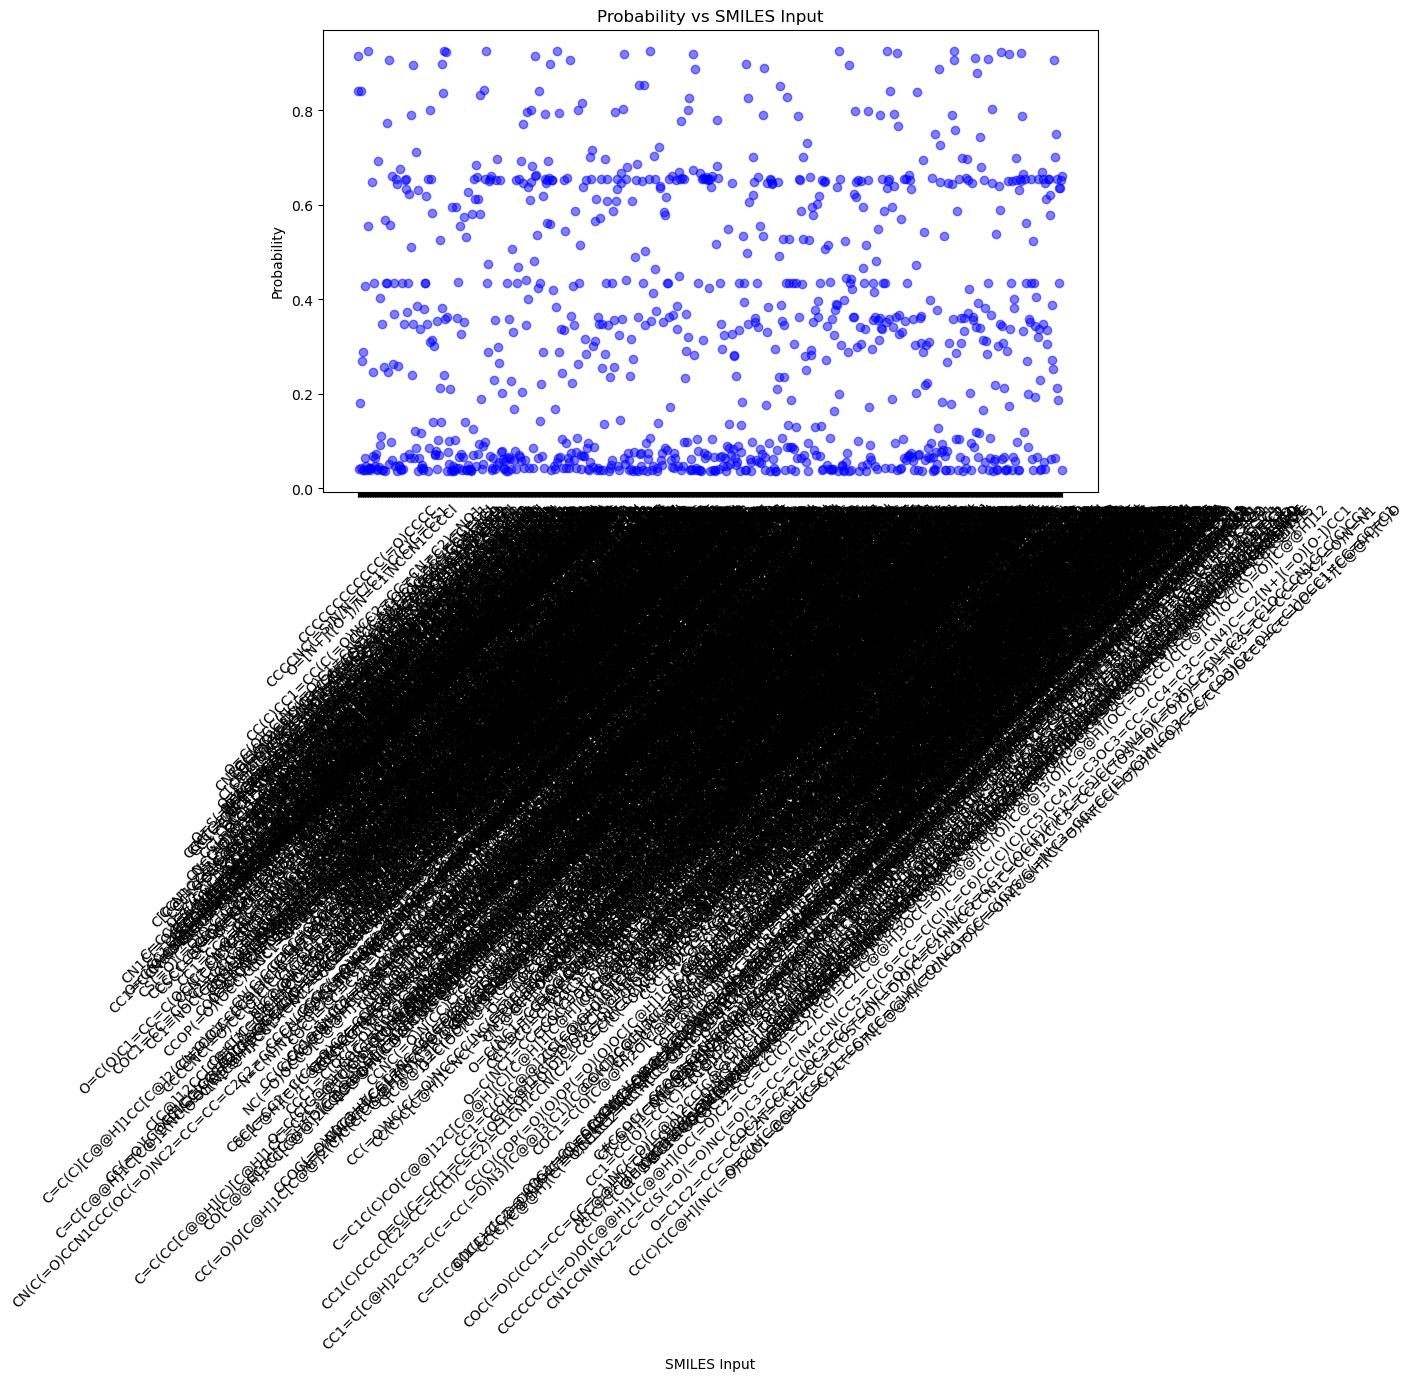

In [12]:
# In this codeblock I will create the necessary plots with MatPlotLib to observe the distribution of predicted values


df = pd.read_csv("eos2at5outputs.csv")

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['input'], df['probability'], color='blue', alpha=0.5)
plt.title('Probability vs SMILES Input')
plt.xlabel('SMILES Input')
plt.ylabel('Probability')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()



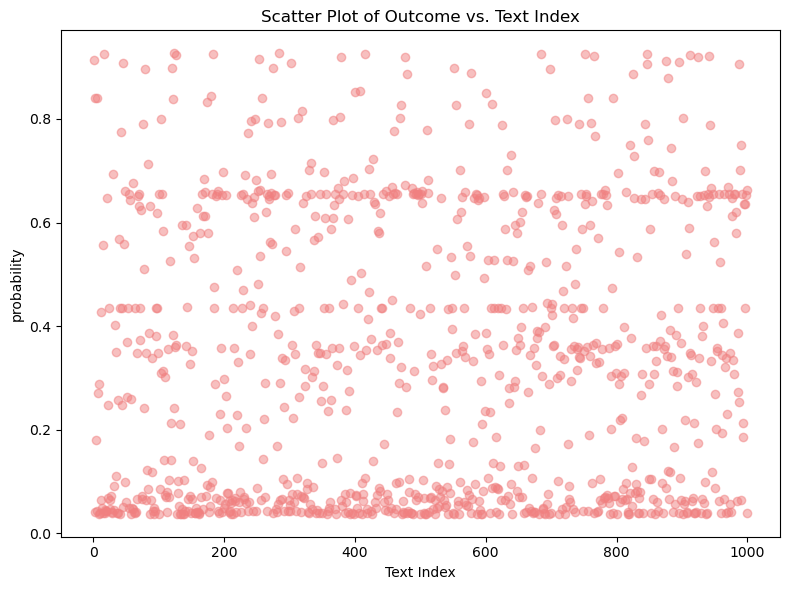

In [14]:
#Indexing the text (smiles string) then plotting a scatter plot
df = pd.read_csv("eos2at5outputs.csv")

# Assign index numbers to the text column
df['text_index'] = range(1, len(df) + 1)
plt.figure(figsize=(8, 6))
plt.scatter(df['text_index'], df['probability'], color='lightcoral', alpha=0.5)
plt.title('Scatter Plot of Outcome vs. Text Index')
plt.xlabel('Text Index')
plt.ylabel('probability')
plt.tight_layout()
plt.show()


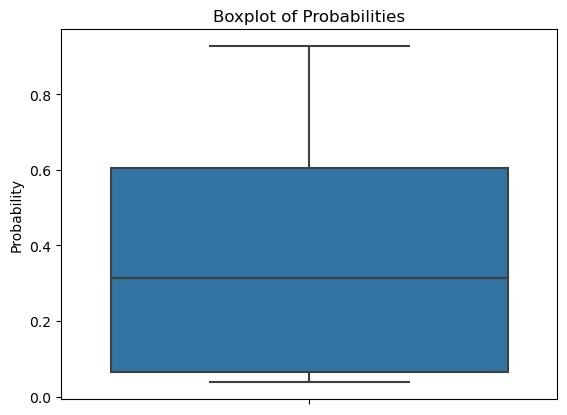

In [15]:
#Making a box plot to check for ouliers in the output that might lead to comment on model bias

df = pd.read_csv("eos2at5outputs.csv")  

# Create a boxplot to visualize the spread of probabilities
sns.boxplot(data=df, y="probability")
plt.title("Boxplot of Probabilities")
plt.ylabel("Probability")
plt.show()

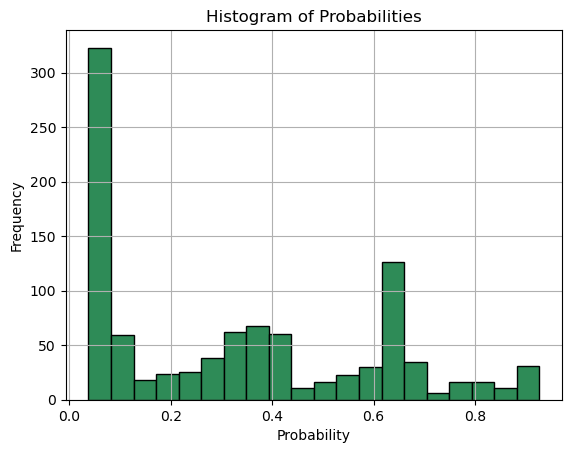

In [16]:
## Visualising the outputs of eos2ta5 via histograms


# Create a histogram to visualize the distribution of probabilities
plt.hist(df['probability'], bins=20, color='seagreen', edgecolor='black')
plt.title("Histogram of Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



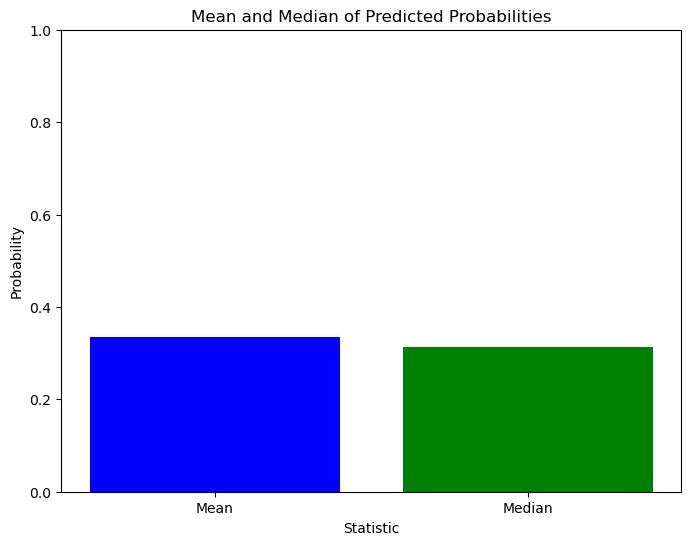

In [17]:
#Plotting the mean and medain in the outcome probabilities
df = pd.read_csv("eos2at5outputs.csv") 
# Calculate mean and median of predicted probabilities
mean_prediction = df['probability'].mean()
median_prediction = df['probability'].median()

# Plot mean and median
plt.figure(figsize=(8, 6))
plt.bar(['Mean', 'Median'], [mean_prediction, median_prediction], color=['blue', 'green'])
plt.title('Mean and Median of Predicted Probabilities')
plt.xlabel('Statistic')
plt.ylabel('Probability')
plt.ylim(0, 1) 
plt.show()


In [19]:
# Since ground truths for this 1k molecule dataset was unavailable 
# I proceeded to calculate mean and meadian for finding out errors such as MSE, Mae and RMSE
#for some insights on the model bias


df = pd.read_csv("eos2at5outputs.csv")  
# Calculate mean and median of predicted probabilities
mean_prediction = df['probability'].mean()
median_prediction = df['probability'].median()

# Calculate errors using mean and median
mse_mean = np.mean((df['probability'] - mean_prediction) ** 2)
mse_median = np.mean((df['probability'] - median_prediction) ** 2)

mae_mean = np.mean(np.abs(df['probability'] - mean_prediction))
mae_median = np.mean(np.abs(df['probability'] - median_prediction))

rmse_mean = np.sqrt(mse_mean)
rmse_median = np.sqrt(mse_median)

print("Mean Squared Error (MSE) using mean:", mse_mean)
print("Mean Squared Error (MSE) using median:", mse_median)
print("Mean Absolute Error (MAE) using mean:", mae_mean)
print("Mean Absolute Error (MAE) using median:", mae_median)
print("Root Mean Squared Error (RMSE) using mean:", rmse_mean)
print("Root Mean Squared Error (RMSE) using median:", rmse_median)


Mean Squared Error (MSE) using mean: 0.07268219335479993
Mean Squared Error (MSE) using median: 0.0731385610416091
Mean Absolute Error (MAE) using mean: 0.23438612477280468
Mean Absolute Error (MAE) using median: 0.23399734927083782
Root Mean Squared Error (RMSE) using mean: 0.2695963526363069
Root Mean Squared Error (RMSE) using median: 0.2704414188722007
